# Exploratory Data Analysis on Flower Shop "Blossom Delight"

## Introduction

"Blossom Delight" is a charming flower shop situated in the United Kingdom. The shop offers a wide variety of floral arrangements, bouquets, and plants catering to different occasions and customer preferences. The shop's clientele includes individuals, event planners, and local businesses. The dataset at hand encompasses sales of individual orders.

Our objective is to identify areas of improvement and potential avenues for "Blossom Delight" to enhance its business growth.

We also assume that "Blossom Delight" is a locally-owned business managed by passionate individuals invested in their trade. These owners may not be experts in data analysis, so our insights will be communicated in simple terms, aiming to provide actionable recommendations and strategic insights.

## Business Questions

**Product Popularity Analysis:**<br>

1.Which products are the top sellers based on the generated sales data?<br>
2.Are there specific products that consistently perform well throughout the year?<br>

**Customer Behavior Insights:**<br>

3.What is the average number of products purchased per customer order?<br>

**Sales Distribution by Time of Day:**<br>

4.At what times of the day do customers most frequently make purchases?<br>
5.Is there a particular time of day that sees higher sales activity?<br>

**Seasonal Discount Impact:**<br>

6.How does the presence of holiday dates or special occasions affect sales?<br>

**Customer Demographics Influence:**<br>

7.Are there certain age groups that contribute more to sales compared to others?<br>
8.Do different age groups show preferences for specific products?<br>

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
import pandas as pd
df = pd.read_csv('sales_data.csv')
df.head()

,row_id,order_id,product_id,product_name,price,quantity,customer_name,customer_age,date,time
0,1,1,7,Carnation Basket,16,1,Liam Anderson,44,10/08/2022,17:42:13
1,2,2,4,Mixed Tulip Arrangement,18,4,Harper Thomas,39,11/08/2022,09:48:51
2,3,2,2,White Lily Vase,15,2,Harper Thomas,39,11/08/2022,09:48:51
3,4,3,3,Sunflower Bunch,12,1,Harper Harris,37,10/08/2022,16:45:26
4,5,4,7,Carnation Basket,16,1,Charlotte Miller,69,11/08/2022,06:21:18


In [29]:
#Overview of dataset
df.describe()
# No missing values

,row_id,order_id,product_id,price,quantity,customer_age
count,6417.000000,6417.000000,6417.000000,6417.000000,6417.000000,6417.000000
mean,3209.000000,1805.497896,5.492909,17.950912,2.213028,44.605111
std,1852.572671,1060.277289,2.859172,5.443165,1.477586,15.118007
min,1.000000,1.000000,1.000000,10.000000,1.000000,18.000000
25%,1605.000000,892.000000,3.000000,14.000000,1.000000,29.000000
50%,3209.000000,1801.000000,5.000000,16.000000,1.000000,46.000000
75%,4813.000000,2712.000000,8.000000,22.000000,3.000000,56.000000
max,6417.000000,3644.000000,10.000000,28.000000,5.000000,69.000000


In [30]:
df['row_id'].duplicated().sum()
#No duplicated rows

0

In [31]:
df['order_id'].duplicated().sum()
#Multiple orders per customer hence duplicates of order_id

2773

### 1.Which products are the top sellers based on the generated sales data?

In [32]:
df.groupby('product_name').count().sort_values(by='quantity', ascending=False)['quantity'].reset_index().head(10)

,product_name,quantity
0,Carnation Basket,686
1,Mixed Tulip Arrangement,656
2,Orchid Plant,653
3,White Lily Vase,652
4,Wildflower Jar,650
5,Sunflower Bunch,637
6,Peony Bouquet,628
7,Red Rose Bouquet,626
8,Daisy Bouquet,623
9,Potted Lavender,606


Top selling products include Carnation Basket, Mixed Tulip Arrangement, Orchid Plant, White Lily Vase and Wildflower Jar.

In [112]:
df.dtypes

row_id              int64
order_id            int64
product_id          int64
product_name       object
price               int64
quantity            int64
customer_name      object
customer_age        int64
date               object
time               object
Month              object
age_group        category
dtype: object

### 2.Are there specific products that consistently perform well throughout the year?<br>

In [113]:
df['date']=pd.to_datetime(df['date']) # Conversion to DateTime format

c:\Users\Hamza\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-08-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Hamza\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-08-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Hamza\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-08-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Hamza\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-08-2022' in DD/MM/YYYY format. Provide format or specif

In [114]:
df['date'] #YYYY-MM-DD

0      2022-08-10
1      2022-08-11
2      2022-08-11
3      2022-08-10
4      2022-08-11
          ...    
6412   2023-08-10
6413   2023-08-10
6414   2023-08-10
6415   2023-08-09
6416   2023-08-09
Name: date, Length: 6417, dtype: datetime64[ns]

In [194]:
df['Month-Year'] = df['date'].dt.strftime('%Y-%m') # Get only the month to summarize and make it visually easier to read

In [188]:
df[['product_name','date','quantity']]

,product_name,date,quantity
0,Carnation Basket,2022-08-10,1
1,Mixed Tulip Arrangement,2022-08-11,4
2,White Lily Vase,2022-08-11,2
3,Sunflower Bunch,2022-08-10,1
4,Carnation Basket,2022-08-11,1
...,...,...,...
6412,Mixed Tulip Arrangement,2023-08-10,4
6413,Red Rose Bouquet,2023-08-10,5
6414,Orchid Plant,2023-08-10,3
6415,Potted Lavender,2023-08-09,1


In [195]:
monthly_sales = df.groupby(['Month-Year','product_name']).agg(
    Quantity = ('quantity', 'sum'),   
).sort_values(by='Month-Year', ascending=True).reset_index() # Preparing dataset for lineplot


In [196]:
monthly_sales.head() # Product sales by month

,Month-Year,product_name,Quantity
0,2022-08,Carnation Basket,135
1,2022-08,Daisy Bouquet,62
2,2022-08,Mixed Tulip Arrangement,88
3,2022-08,Orchid Plant,96
4,2022-08,Peony Bouquet,108


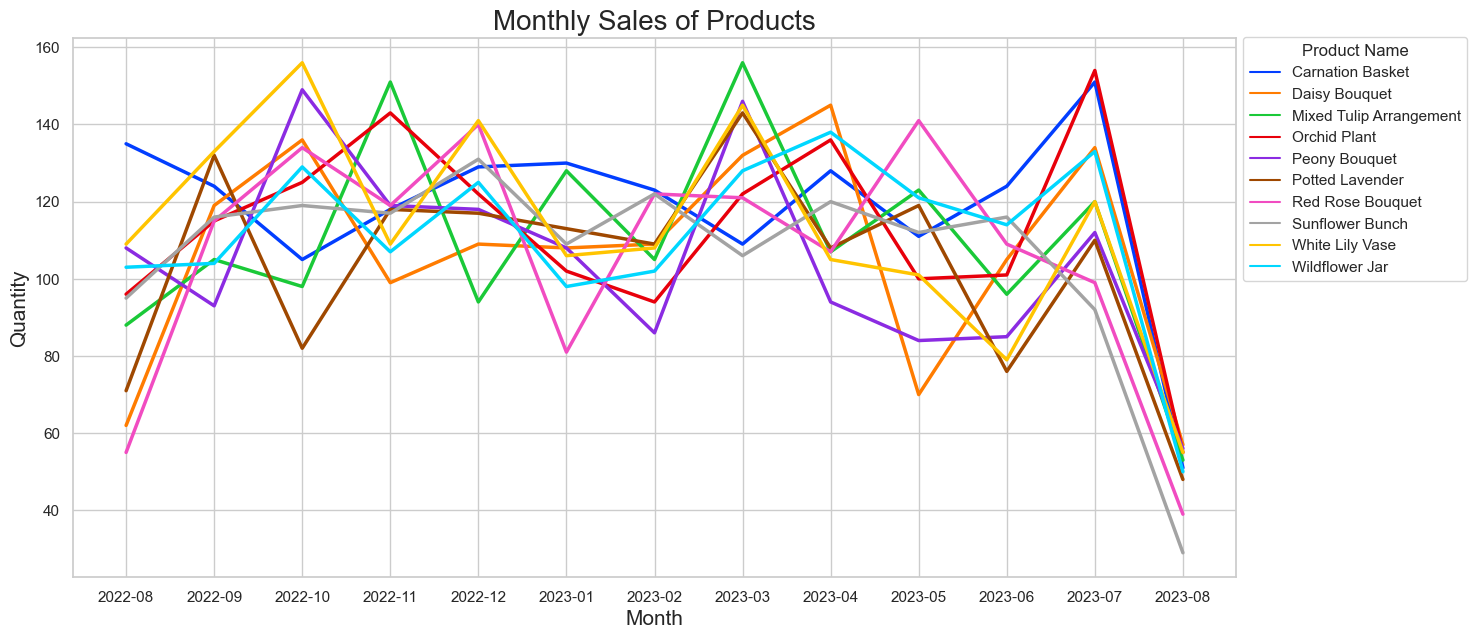

In [197]:
sns.set_theme(style="whitegrid")
fig,ax = plt.subplots(figsize=(15,7))
sns.lineplot(data=monthly_sales, x='Month-Year', y='Quantity', hue='product_name', ax=ax, linewidth=2.5, palette='bright', legend='auto')
ax.legend(title="Product Name", bbox_to_anchor=(1, 1.016), loc='upper left')
ax.set_title('Monthly Sales of Products', fontsize=20)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Quantity', fontsize=15)
plt.show()

Carnation Basket, Orchid Plant, White Lily Vase are the products which sell well almost throughout the year. 

### 3.What is the average number of products purchased per customer order?<br>

In [75]:
df.groupby('order_id').sum().sort_values(by='quantity',ascending=False)['quantity'].mean()
#We had to answer the question this way because we have multiple products per order hence 
#taking average of the quantity column will be incorrect.

3.8970911086717894

A customer at bought 3.9 products at an average.

### 4.At what times of the day do customers most frequently make purchases?<br>

In [40]:
df.groupby('time').count().sort_values(by='order_id', ascending=False)['order_id'].reset_index()

,time,order_id
0,20:55:00,9
1,17:54:10,8
2,13:07:13,6
3,04:31:47,6
4,05:31:40,6
...,...,...
3577,09:23:18,1
3578,09:23:54,1
3579,09:26:33,1
3580,09:26:44,1


Most orders are received at 20:55:00 and 17:54:10.

### 5.Is there a particular time of day that sees higher sales activity?

In [74]:
df.groupby('time').sum().sort_values(by='price', ascending=False)[['quantity', 'price']].reset_index()

,time,quantity,price
0,20:55:00,22,153
1,17:54:10,22,131
2,01:50:09,14,122
3,01:49:46,14,117
4,05:31:40,18,116
...,...,...,...
3577,14:09:52,1,10
3578,01:53:05,1,10
3579,01:53:06,1,10
3580,14:11:04,1,10


Two noticeable time are 20:55:00 and 17:54:10. One marks the evening. The other marks the start of night/dinner time hence it does make sense e.g someone going on a dinner/date would buy flowers at that time.
Secondly, In the evening, going back from the office, usually people buy flowers for their partners and parents.

### 6.How does the presence of holiday dates or special occasions affect sales?<br>

In [42]:
df.head(2)

,row_id,order_id,product_id,product_name,price,quantity,customer_name,customer_age,date,time,Month
0,1,1,7,Carnation Basket,16,1,Liam Anderson,44,2022-10-08,17:42:13,10
1,2,2,4,Mixed Tulip Arrangement,18,4,Harper Thomas,39,2022-11-08,09:48:51,11


In [115]:
df['date'].min(), df['date'].max()
print('Start Date: ', df['date'].min(), '\nEnd Date: ', df['date'].max()) #YYYY-MM-DD

Start Date:  2022-08-10 00:00:00 
End Date:  2023-08-10 00:00:00


In [116]:
df['date'].min()

Timestamp('2022-08-10 00:00:00')

In [95]:
df[df['date']=='2022-01-09']

,row_id,order_id,product_id,product_name,price,quantity,customer_name,customer_age,date,time,Month,age_group
393,394,201,2,White Lily Vase,15,1,Grace Lee,26,2022-01-09,04:27:14,01,25-30
394,395,201,3,Sunflower Bunch,12,4,Grace Lee,26,2022-01-09,04:27:14,01,25-30
395,396,201,8,Potted Lavender,22,5,Grace Lee,26,2022-01-09,04:27:14,01,25-30
396,397,201,10,Peony Bouquet,28,2,Grace Lee,26,2022-01-09,04:27:14,01,25-30
397,398,201,6,Daisy Bouquet,14,4,Grace Lee,26,2022-01-09,04:27:14,01,25-30
398,399,202,3,Sunflower Bunch,12,1,Isabella Moore,38,2022-01-09,02:29:18,01,30-40
399,400,203,8,Potted Lavender,22,2,Isabella Clark,29,2022-01-09,04:52:25,01,25-30
400,401,203,5,Orchid Plant,25,4,Isabella Clark,29,2022-01-09,04:52:25,01,25-30
401,402,203,10,Peony Bouquet,28,1,Isabella Clark,29,2022-01-09,04:52:25,01,25-30
402,403,204,6,Daisy Bouquet,14,1,Luna Lewis,65,2022-01-09,08:54:44,01,60-70


In [118]:
print('Total Number of Days in Dataset:',df['date'].max()-df['date'].min())

Total Number of Days in Dataset 365 days 00:00:00


In [124]:
print('Sales on Christmas Day:',df[df['date']=='25/12/2022']['quantity'].sum()) #Sales on Christmas Day

Sales on Christmas Day: 40


In [121]:
print('Sales on New Years Day: ',df[df['date']=='01/01/2023']['quantity'].sum()) #Sales on New Year's Day

Sales on New Years Day:  27


In [120]:
print('Average Number of sales on normal days: ',(df[df['date']!='25/12/2022']['quantity'].sum())/(363)) #Average number of sales on normal days

Average Number of sales on normal days:  39.011019283746556


c:\Users\Hamza\anaconda3\lib\site-packages\pandas\core\arraylike.py:44: UserWarning: Parsing '25/12/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.ne)


Sales on Christmas Day are only 40 whilst Sales on New Years are less standing at 27. On a normal day, sales average at 39.

### 7.Are there certain age groups that contribute more to sales compared to others?<br>

In [45]:
df['customer_age'].max() #Maximun age of the customers

69

In [46]:
df['customer_age'].min() #Minimum age of customer

18

In [134]:
age_bins = [18, 25, 30, 40, 50, 60, 70]
age_labels = ['18-24', '25-29', '30-39', '40-49', '50-59', '60-69',]

df['age_group'] = pd.cut(df['customer_age'], bins=age_bins, labels=age_labels, right=False) #Bins the age column into age groups

In [135]:
df.groupby('age_group').sum().sort_values(by='age_group', ascending=False)[['quantity', 'price']].reset_index()

,age_group,quantity,price
0,60-69,2766,22923
1,50-59,3965,31977
2,40-49,1742,14091
3,30-39,2193,17541
4,25-29,1766,14629
5,18-24,1769,14030


In [140]:
age_group_sales = df.groupby('age_group').sum().sort_values(by='age_group', ascending=False)[['quantity', 'price']].reset_index()

Yes, age group of 50-60 contribute more to sales as compared to other age groups.

In [141]:
age_group_sales.rename(columns={'price': 'total_sales'}, inplace=True) #Rename column   

In [142]:
age_group_sales.rename(columns={'age_group':'Age Group'}, inplace=True) # Rename column

In [143]:
age_group_sales

,Age Group,quantity,total_sales
0,60-69,2766,22923
1,50-59,3965,31977
2,40-49,1742,14091
3,30-39,2193,17541
4,25-29,1766,14629
5,18-24,1769,14030


In [159]:
print('Total Sales of age group 18-49:',age_group_sales.iloc[2:6]['total_sales'].sum()) # Total sales of age group 18-49

Total Sales of age group 18-49: 60291


In [160]:
print('Total Sales of age group 50-69:',age_group_sales.iloc[0:2]['total_sales'].sum()) # Total sales of age group 50-69

Total Sales of age group 50-69: 54900


<AxesSubplot:title={'center':'Total Sales by Age Group'}, xlabel='Age Group', ylabel='Total Sales'>

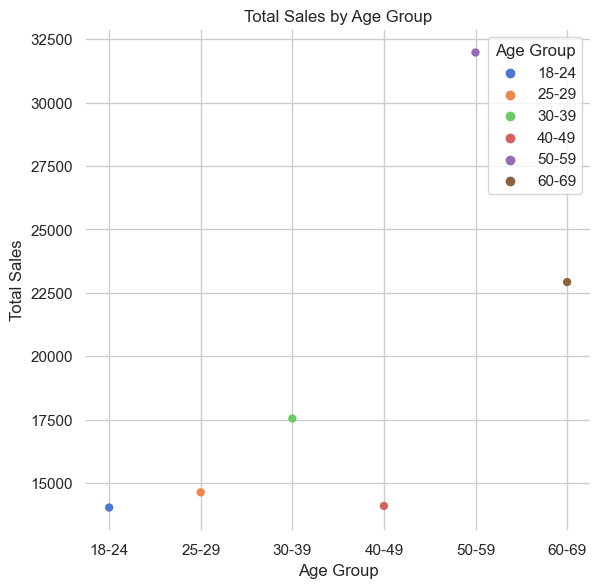

In [165]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
ax.set_title("Total Sales by Age Group")
ax.set_ylabel("Total Sales")
ax.set_xlabel("Age Group")
sns.scatterplot(x="Age Group", y="total_sales",
                hue="Age Group", 
                palette="muted",
                linewidth=0,
                data=age_group_sales, ax=ax,
                )


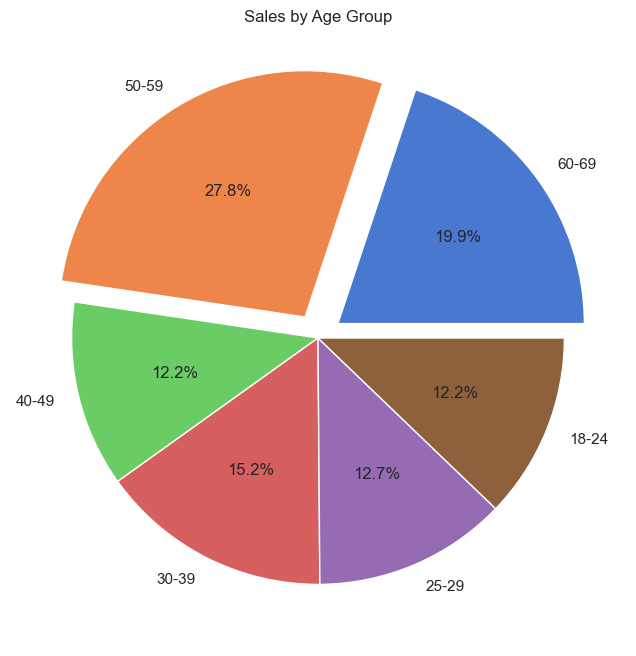

In [213]:
plt.figure(figsize=(8, 8))
plt.title('Sales by Age Group')
explode = [0.1, 0.1, 0, 0, 0,0]
plt.pie(data=age_group_sales, x=age_group_sales['total_sales'], labels=age_group_sales['Age Group'], autopct='%.1f%%', colors=sns.color_palette('muted'), explode=explode)
# declaring exploding pie

plt.show()

The first four groups contribute only 60291 dollars of sales. Whilst the last two groups alone total to 54900 amount in sales.

### 8.Do different age groups show preferences for specific products?

In [50]:
df.groupby(['age_group', 'product_name']).size().unstack(fill_value=0).reset_index()

product_name,age_group,Carnation Basket,Daisy Bouquet,Mixed Tulip Arrangement,Orchid Plant,Peony Bouquet,Potted Lavender,Red Rose Bouquet,Sunflower Bunch,White Lily Vase,Wildflower Jar
0,18-25,97,81,81,76,71,69,69,90,76,88
1,25-30,72,80,91,79,97,69,78,75,78,88
2,30-40,110,92,95,95,99,82,112,91,110,85
3,40-50,77,74,83,86,75,78,76,79,71,83
4,50-60,195,179,169,176,164,177,166,194,197,182
5,60-70,135,117,137,141,122,131,125,108,120,124


Text(0, 0.5, 'Quantity')

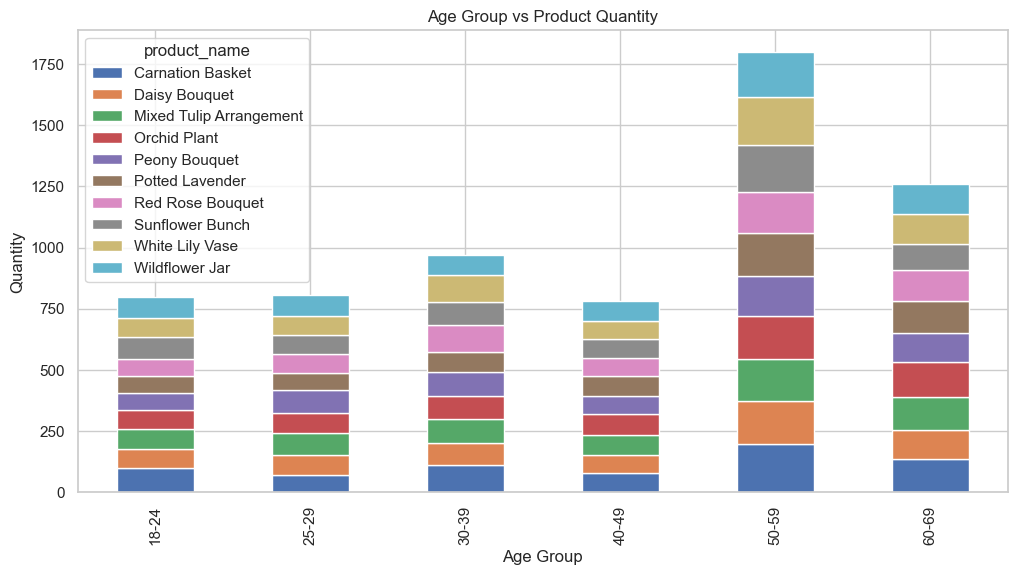

In [164]:
fig,ax = plt.subplots(figsize=(12,6))
df.groupby(['age_group', 'product_name']).size().unstack(fill_value=0).reset_index().plot.bar(x='age_group', stacked=True,  title='Age Group vs Product Quantity',ax=ax)
ax.set_xlabel('Age Group')
ax.set_ylabel('Quantity')

Age groups 18-25, 25-30, 40-50 have a similar purchase quantity but are lower compared to other age groups.<br>
Age groups 50-69 have a high purchase volume compared to all other groups. Hence it can be said that a lot of the customers come from this age group.

## Recommendations  <br>

The analysis clearly reveals that the majority of customers and sales originate from older age groups. To attract younger customers, the introduction of contemporary products is necessary. Additionally, ensuring affordability for products aimed at younger demographics can lead to a more substantial contribution to sales. Offering student discounts and enhancing packaging with popular aesthetic items like keychains and stickers may further appeal to younger students.<br>

The analysis highlights that sales during holiday dates or special occasions do not significantly differ from those on average days. Therefore, strategizing with sales on specific products and marketing those sales a few days ahead of the occasion could bolster sales during such times.<br>

Implementing a Customer Loyalty program with discounted offerings has the potential to bolster customer retention while also enhancing the precision of analytical insights. This initiative would distinguish the shop from its competitors within the local area. Additionally, incorporating referral bonus points for holders of the Customer Loyalty Program can incentivize the acquisition of new customers, thus fostering an eventual increase in sales.<br>

The combination of high-performing products with their lower-performing counterparts is an approach that may enhance the sales of the latter category. This strategy could not only elevate the sales of these products but also potentially augment the average daily product sales.<br>
